 # Exploratory Data Analysis on Wine Reviews

## Name : Malela Balakrishna Goud

In [28]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [24]:
# Loading the data

wine_data = pd.read_csv("C:/Users/Malela Balakrishna/Downloads/wine-reviews.csv",delimiter = ',')
df = wine_data.copy()
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [25]:
# Getting the information regarding the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [4]:
# Getting the statistical values of dataset for better understanding

df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


## Data Cleaning

In [5]:
# Removing the index column as it is already having the default column

df.drop(columns = ["Unnamed: 0"],inplace = True)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [6]:
# Removing the columns which are not much necessary for furthur data analysis

df = df.drop(columns = ["designation", "region_1", "region_2", "taster_twitter_handle"],axis = 1)
df.head()

,country,description,points,price,province,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [7]:
# Getting the information regarding the dataset after removing columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   taster_name  103727 non-null  object 
 6   title        129971 non-null  object 
 7   variety      129970 non-null  object 
 8   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 8.9+ MB


In [8]:
# Getting the information regarding the null values in the dataset

df.isna().sum()

country           63
description        0
points             0
price           8996
province          63
taster_name    26244
title              0
variety            1
winery             0
dtype: int64

## Exploratory data analysis

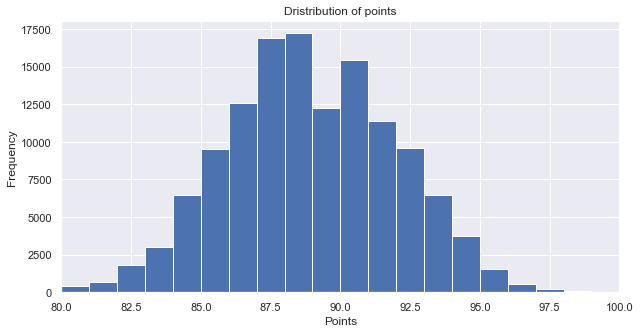

In [9]:
# Distribution of points

plt.figure(figsize = (10,5))
plt.hist(data=df, x='points', bins=np.arange (80, df['points'].max()+1))
plt.xlim(80,100)
plt.title('Dristribution of points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

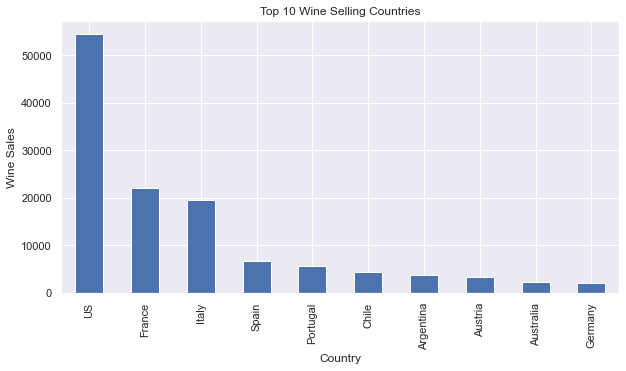

In [10]:
# Top 10 wine selling countries

plt.figure(figsize = (10,5))
Top_10_countries = df["country"].value_counts()[:10]
Top_10_countries.plot(kind='bar')
plt.title('Top 10 Wine Selling Countries')
plt.xlabel('Country')
plt.ylabel('Wine Sales')
plt.show()

#### US produces highest amount of wines from the above bar graph

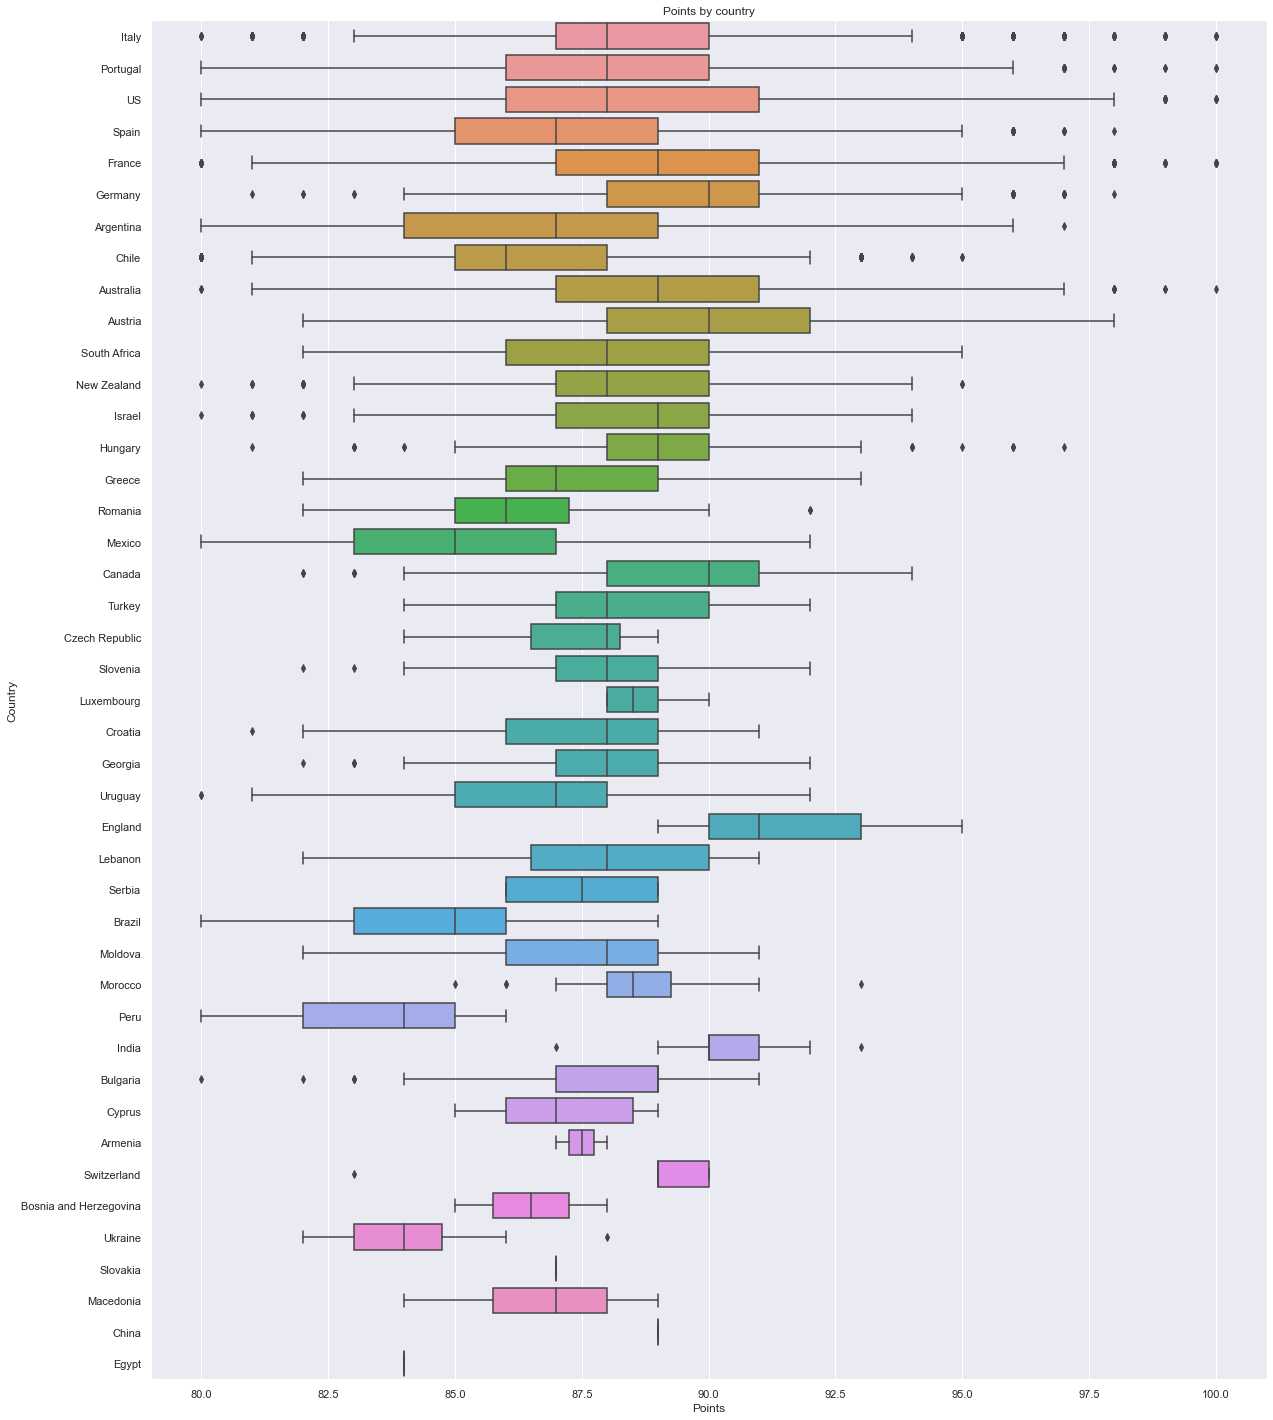

In [11]:
# Points by country

plt.figure(figsize=(20,25))
sns.boxplot(data=df, x='points', y='country')
plt.title('Points by country')
plt.xlabel('Points')
plt.ylabel('Country')
plt.show()

#### England has highest average points of wine from the above box plot

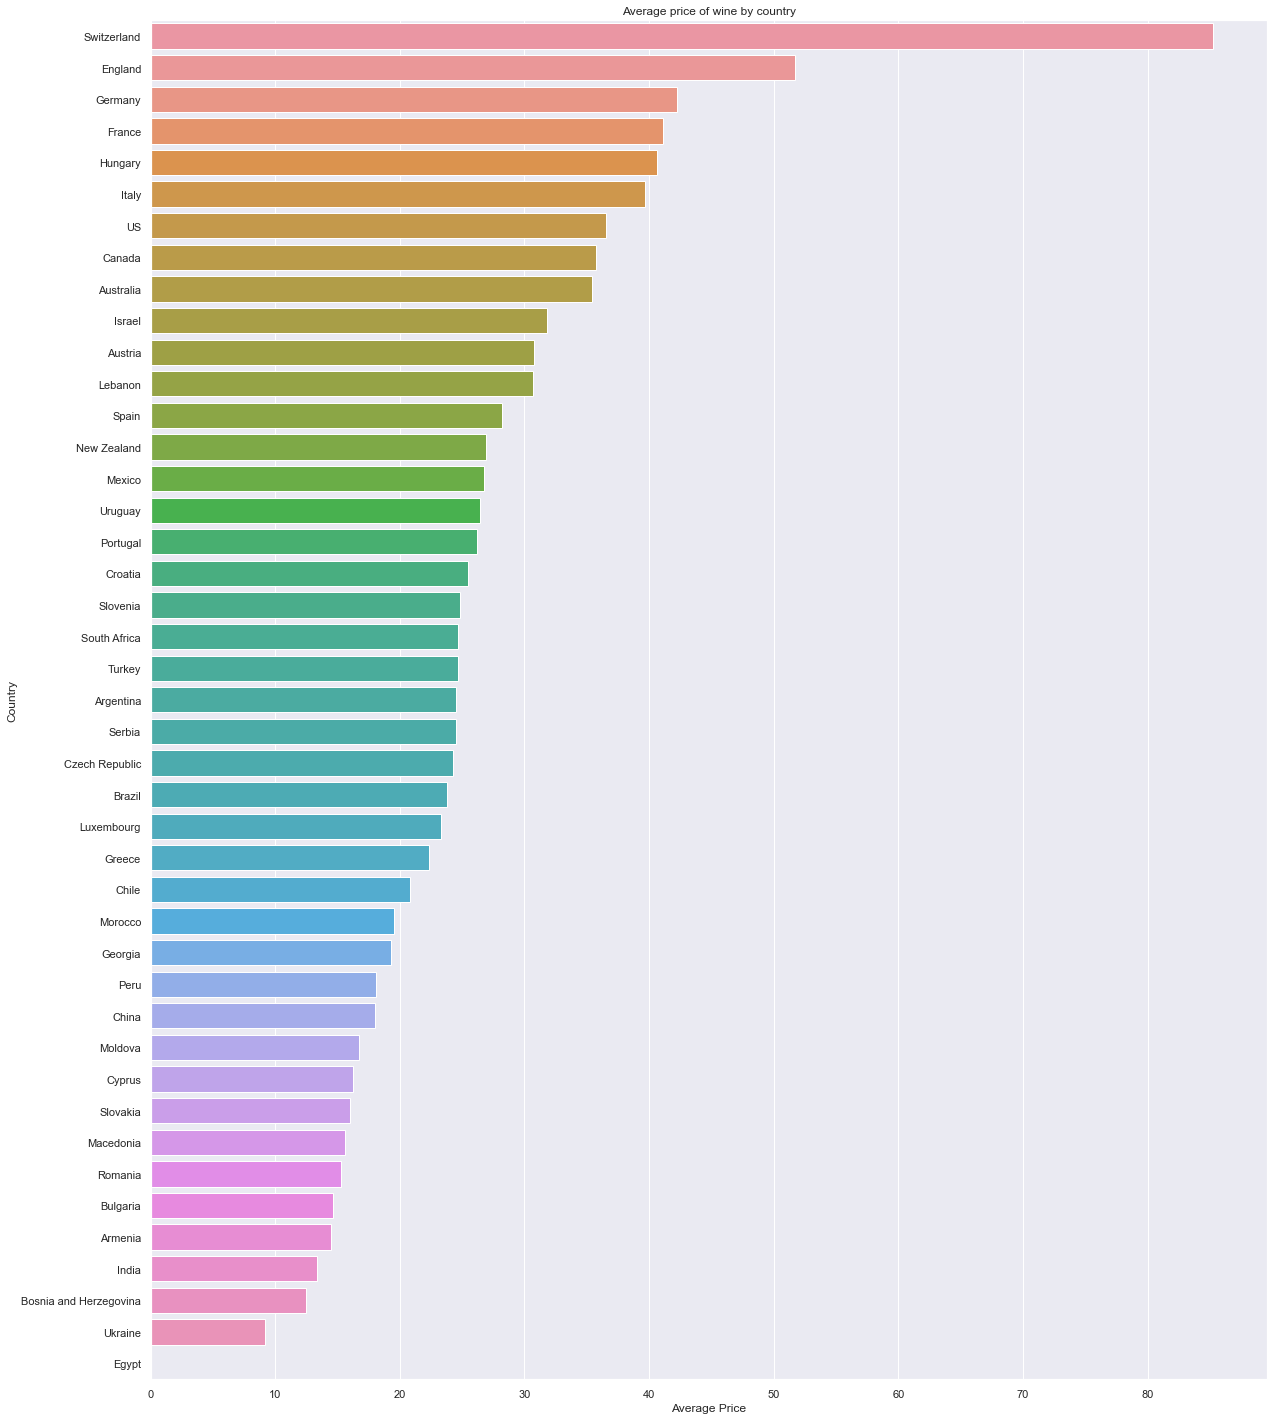

In [12]:
# Average price of wine by country

avg_price = df.groupby("country").agg("mean")
avg_price = avg_price.sort_values(by="price", ascending = False)
y = avg_price.index.to_series()
x = avg_price["price"]

plt.figure(figsize=(20,25))
sns.barplot(x=x,y=y)
plt.title('Average price of wine by country')
plt.xlabel('Average Price')
plt.ylabel('Country')
plt.show()

#### From the above graph, Switzerland has highest average price of wines while Egypt has lowest average price of wines

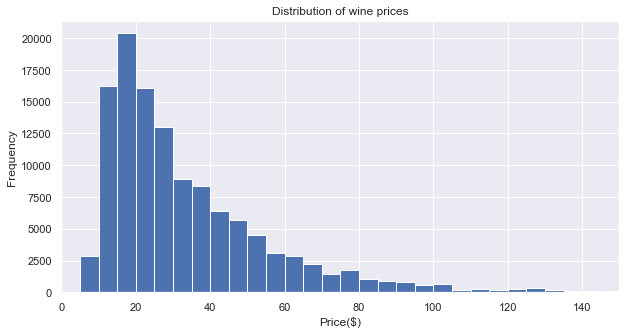

In [13]:
# Distribution of wine prices

plt.figure(figsize=(10,5))
bins = np.arange(0,df["price"].max()+5,5)
plt.hist(data=df,x='price',bins=bins)
plt.xlim(0,150)
plt.title('Distribution of wine prices')
plt.xlabel('Price($)')
plt.ylabel('Frequency')
plt.show()

#### From the above graph, we can see that a lot of wines which are at the lower price spectrum have been sold huge

Text(0, 0.5, 'Points')

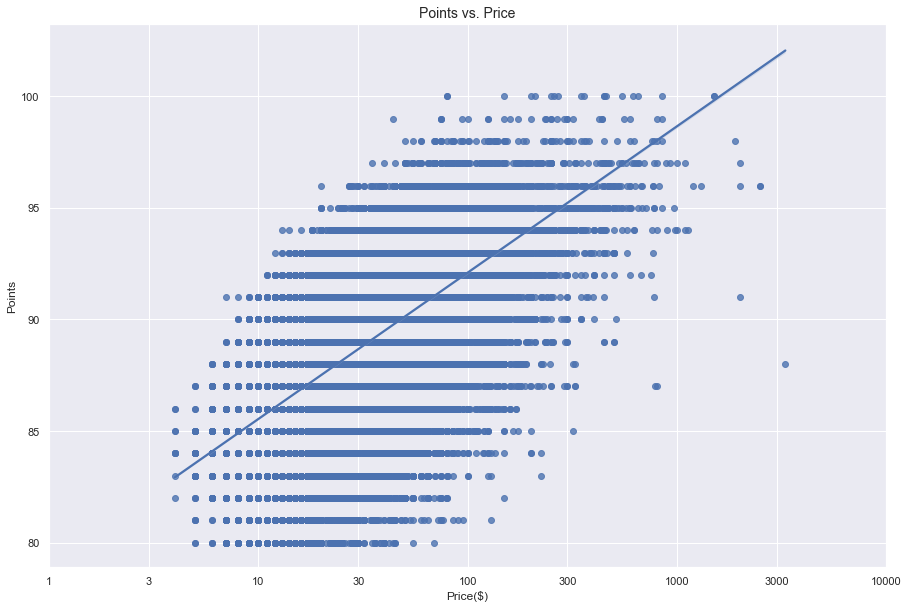

In [14]:
# Relation between prices and points

x = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]

plt.figure(figsize=(15, 10))
sns.regplot(x='price',y='points',data=df,logx=True)
plt.title("Points vs. Price", fontsize=14)
plt.xscale('log')
plt.xticks(x, x)
plt.xlabel("Price($)")
plt.ylabel("Points")

####  From the above graph, we can see that there is a linear relation between price and points, which means that expensive wines get better ratings

In [15]:
# Top 10 most frequent variety of wines by points scored

df["variety"].value_counts()[:10]

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Riesling                     5189
Sauvignon Blanc              4967
Syrah                        4142
Rosé                         3564
Merlot                       3102
Name: variety, dtype: int64

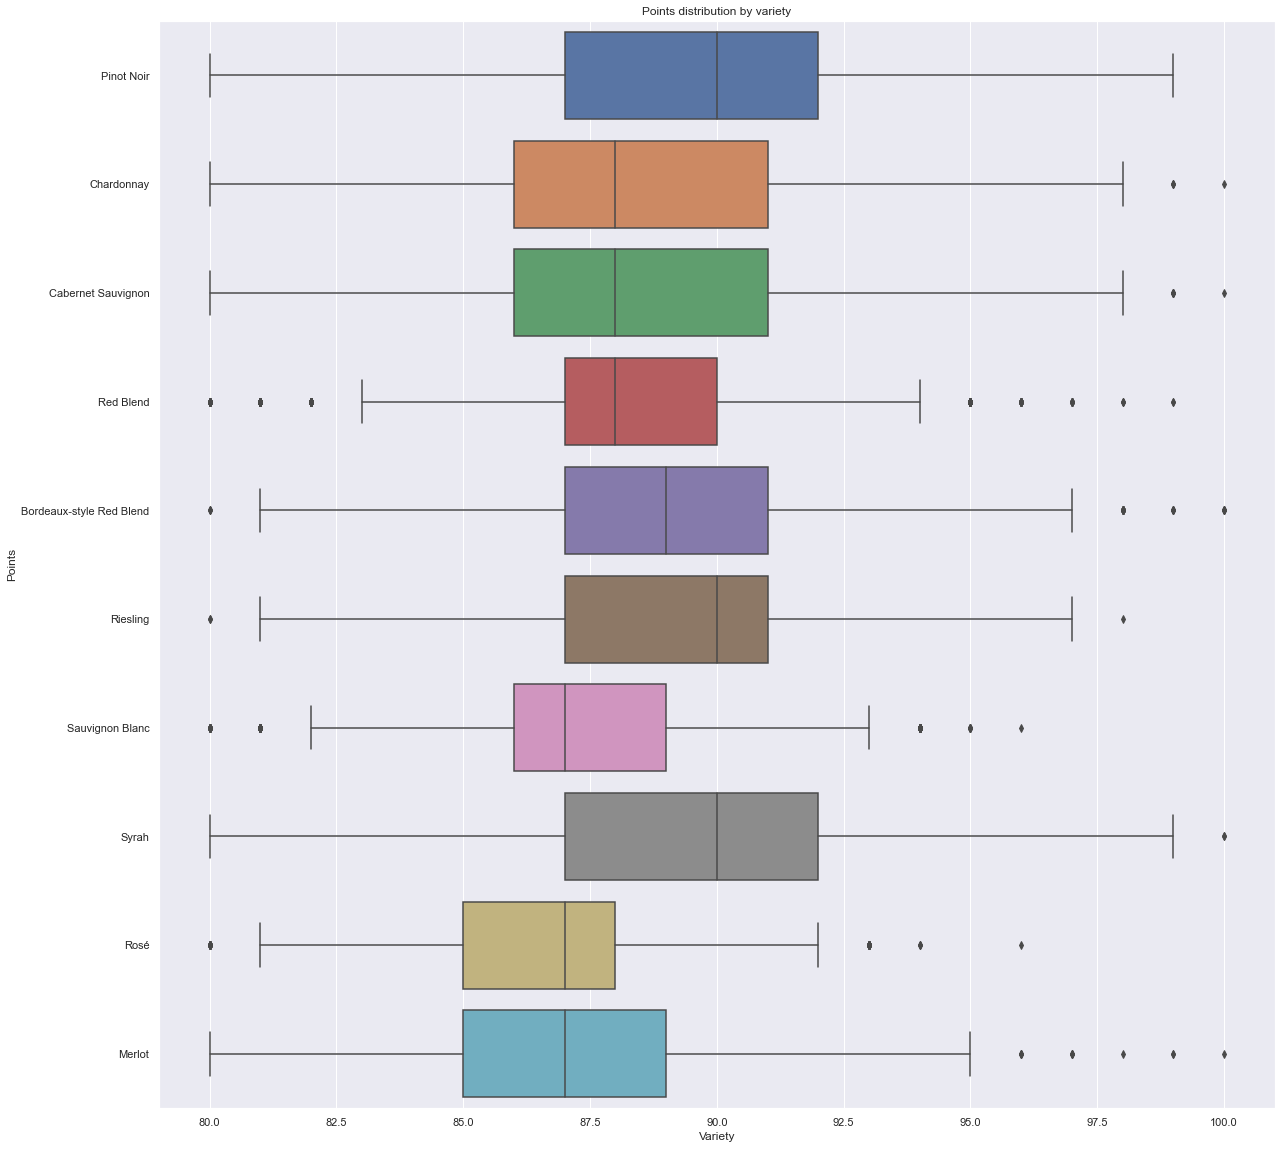

In [16]:
plt.figure(figsize=(20, 20))
sns.boxplot( data=df, x='points', y='variety', order=df["variety"].value_counts().iloc[:10].index )
plt.title('Points distribution by variety')
plt.xlabel('Variety')
plt.ylabel('Points')
plt.show()

#### Above box plot describes about the top 10 most frequent variety of wines by points scored

In [17]:
# Top 10 winery

df["winery"].value_counts()[:10]


Wines & Winemakers       222
Testarossa               218
DFJ Vinhos               215
Williams Selyem          211
Louis Latour             199
Georges Duboeuf          196
Chateau Ste. Michelle    194
Concha y Toro            164
Columbia Crest           159
Kendall-Jackson          130
Name: winery, dtype: int64

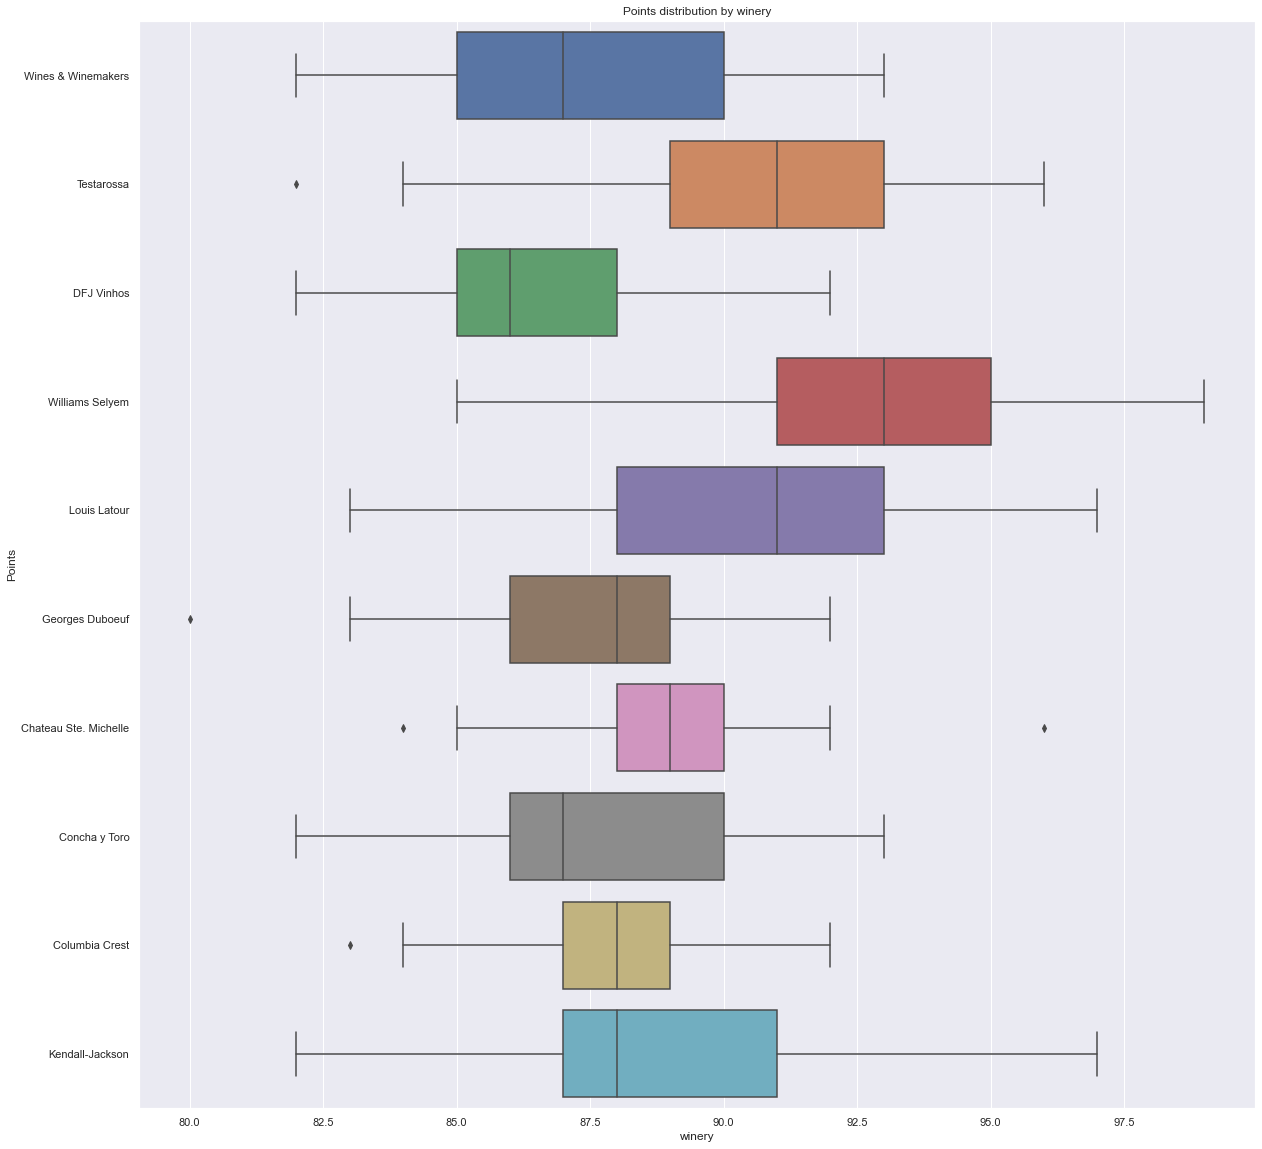

In [18]:
plt.figure(figsize=(20, 20))
sns.boxplot( data=df, x='points', y='winery', order=df["winery"].value_counts().iloc[:10].index )
plt.title('Points distribution by winery')
plt.xlabel('winery')
plt.ylabel('Points')
plt.show()

#### Above box plot describes about the top 10 winery

In [21]:
# Top 10 taster names

df["taster_name"].value_counts()[:10]

Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Name: taster_name, dtype: int64

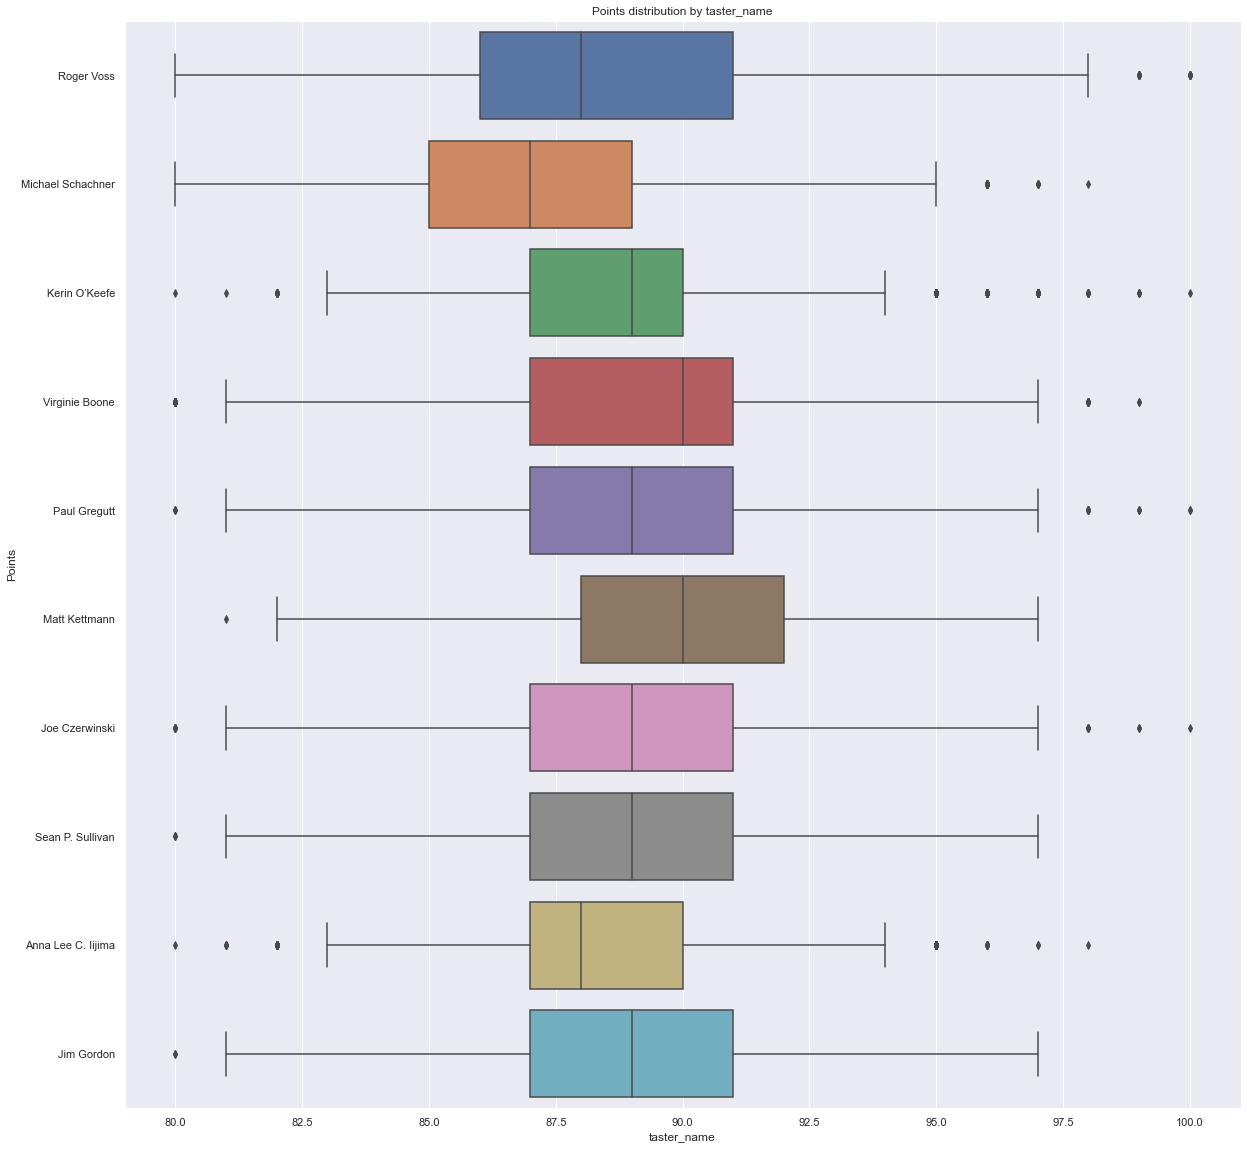

In [22]:
plt.figure(figsize=(20, 20))
sns.boxplot( data=df, x='points', y='taster_name', order=df["taster_name"].value_counts().iloc[:10].index )
plt.title('Points distribution by taster_name')
plt.xlabel('taster_name')
plt.ylabel('Points')
plt.show()

#### Above box plot describes about the top 10 taster names